In [2]:
N = ord("V") % 10 + 1
print(N)

7


#### Побудувати кожну лінію на окремому графіку, розмістивши їх поруч.
- всі прямі повинні бути різного кольору, але не використовувати системну послідовність кольорів (синій, помаранчевий, зелений...);
- всі прямі повинні мати різний тип ліній (пунктирна, точка тире тощо); - всі графіки повинні мати сумісну вісь ординат;
- кожен графік повинен мати підпис;
#### Розмістити всі лінії на одному рисунку.
- всі прямі повинні бути різного кольору, але не використовувати системну послідовність кольорів (синій, помаранчевий, зелений...);
- всі прямі повинні мати різний тип ліній (пунктирна, точка тире тощо); - підібрати масштаб таким чином, щоб всі три точки перетину прямих були в області видимості;
- додати легенду на графік;
- додати сітку, в якій задати колір та тип ліній;
- змінити розмір рисунку (наприклад, 8х16 дюймів) та розподільчу здатність (наприклад, 100 dpi);
- зробити підписи рівнянь прямих вздовж лінії з відповідним нахилом; - додати підписи осей та назву графіку;
- заповнити кольором область, що утворена перетином всіх прямих.

##### За допомогою підмодуля numpy.linalg знайти точки перетину всіх пар прямих, відмітити їх та зробити відповідні вказівки на графіку.

##### Зробити висновки про те, чим відрізняються рисунки в кожному з форматів (розмір, наявність артефактів, вид вмісту файлу).

$$
\begin{cases}
\begin{aligned}
3.2x_1 + 8.8x_2 &= 89 \\
–14.2x_1 + 10.8x_2 &= 125 \\
20.3x_1 – 7.2x_2 &= 142 \\
\end{aligned}
\end{cases}
$$





In [70]:
import numpy as np
import matplotlib.pyplot as plt

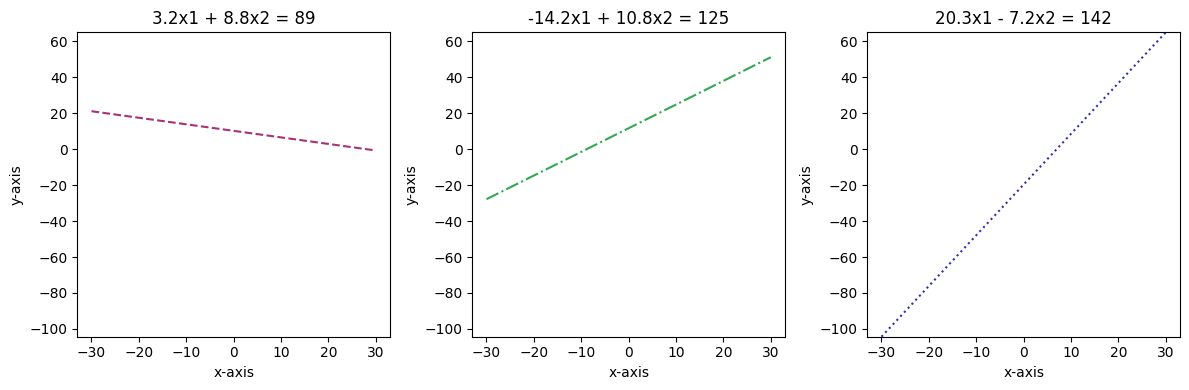

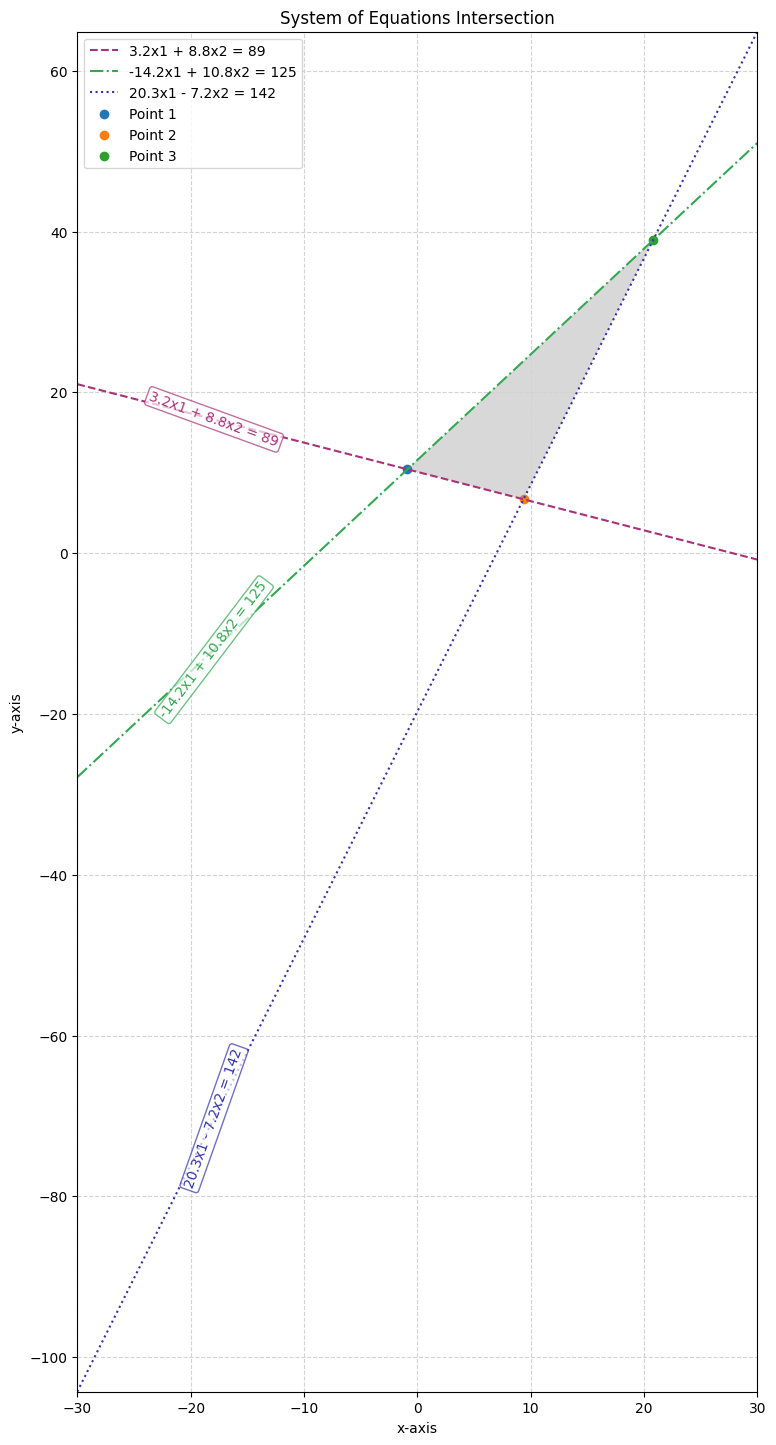

In [111]:
# Define equations as lambda functions
eq1 = lambda x: (89 - 3.2 * x) / 8.8
eq2 = lambda x: (125 + 14.2 * x) / 10.8
eq3 = lambda x: (142 - 20.3 * x) / -7.2

# Define the range of x
x_min = -30  # Modified to focus on the area around the intersection points
x_max = 30   # Modified to focus on the area around the intersection points
x_range = np.linspace(x_min, x_max, 1000)

# Create corresponding y values based on the equations
y1 = eq1(x_range)
y2 = eq2(x_range)
y3 = eq3(x_range)

# Set global y-limits based on all y-values
global_y = np.vstack((y1, y2, y3))
global_y_min, global_y_max = np.min(global_y), np.max(global_y)

# Helper function to calculate the intersection
def find_intersection(coeffs1, coeffs2):
    # Convert the slope-intercept form to the standard form Ax + By = C
    A1, B1 = -coeffs1[0], 1
    C1 = coeffs1[1]

    A2, B2 = -coeffs2[0], 1
    C2 = coeffs2[1]
    
    # Use linalg.solve to find the intersection point
    A = np.array([[A1, B1], [A2, B2]])
    C = np.array([C1, C2])
    
    try:
        intersection = np.linalg.solve(A, C)
        return intersection
    except np.linalg.LinAlgError:
        # This error is raised when the two lines are parallel (no intersection)
        return None

# Find the intersection of all the lines.
line_params = [(-3.2 / 8.8, 89 / 8.8), (14.2 / 10.8, 125 / 10.8), (-20.3 / -7.2, 142 / -7.2)]
intersections = [find_intersection(line_params[i], line_params[j]) 
                 for i in range(len(line_params)) 
                 for j in range(i + 1, len(line_params))]
# Filter None values if lines don't intersect.
intersections = [point for point in intersections if point is not None]
intersections.sort(key=lambda point: point[0])

# Create three subplots with the individual lines.
colors = ['#a83279', '#32a852', '#3232a8']
linestyles = ['--', '-.', ':']
equations = [eq1, eq2, eq3]
titles = ['3.2x1 + 8.8x2 = 89', '-14.2x1 + 10.8x2 = 125', '20.3x1 - 7.2x2 = 142']

# Plot the three subplots
plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.plot(x_range, equations[i](x_range), color=colors[i], linestyle=linestyles[i])
    plt.title(titles[i])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.ylim(global_y_min, global_y_max)

plt.tight_layout()
plt.savefig('3_small_ones.png')  # Save the subplot image as a PNG file
plt.show()  # Display the subplot image before clearing

# Now create the combined plot with annotations and intersection points.
plt.figure(figsize=(8, 16), dpi=100)
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

for i in range(3):
    plt.plot(x_range, equations[i](x_range), label=titles[i], color=colors[i], linestyle=linestyles[i])

# Plot the intersections
for idx, point in enumerate(intersections, start=1):
    plt.scatter(*point, label=f"Point {idx}")

def annotate_line(plt, x_range, func, text, color, intersections):
    # Exclude x values close to intersection points to find candidate ranges for annotation
    exclusion_zone = 5  # distance from intersection points to exclude
    candidate_x_ranges = []
    current_range_start = x_min
    
    # Loop through the sorted intersection points by x and exclude nearby ranges
    for point in intersections:
        if point[0] - exclusion_zone > current_range_start:
            candidate_x_ranges.append((current_range_start, point[0] - exclusion_zone))
        current_range_start = point[0] + exclusion_zone
    
    # Add the last range if there's space left until x_max
    if current_range_start < x_max:
        candidate_x_ranges.append((current_range_start, x_max))
    
    # Find the longest range to place the annotation
    max_range = max(candidate_x_ranges, key=lambda r: r[1] - r[0])
    annotation_x = np.mean(max_range)  # Middle of the longest candidate range

    annotation_y = func(annotation_x)
    # Calculate the angle based on the derivative of the function at the annotation point
    dy = func(annotation_x + 0.01) - func(annotation_x - 0.01)
    dx = 0.02
    angle = np.degrees(np.arctan2(dy, dx))
    
    # Annotate the line with the updated angle and position
    plt.annotate(text, xy=(annotation_x, annotation_y), rotation=angle, color=color,
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(boxstyle="round,pad=0.2", edgecolor=color, facecolor='white', alpha=0.7),
                 clip_on=True)

# Use the updated annotate_line function to annotate each line
annotate_line(plt, x_range, eq1, '3.2x1 + 8.8x2 = 89', colors[0], intersections)
annotate_line(plt, x_range, eq2, '-14.2x1 + 10.8x2 = 125', colors[1], intersections)
annotate_line(plt, x_range, eq3, '20.3x1 - 7.2x2 = 142', colors[2], intersections)

# Unpack the sorted points into two lists for plotting
int_x, int_y = zip(*intersections)

# Fill the area formed by the intersection of lines
plt.fill(int_x, int_y, 'grey', alpha=0.3)

# Add a legend, grid, axes labels, and title
plt.legend()
plt.grid(True, linestyle='--', color='lightgray')
plt.xlabel('x-axis')  # Replace with your actual x-axis label
plt.ylabel('y-axis')  # Replace with your actual y-axis label
plt.title('System of Equations Intersection')

plt.xlim(min(x_range), max(x_range))
plt.ylim(global_y_min, global_y_max)

plt.savefig('merged_plot.png')  # Save the detailed plot image as a PNG file
plt.show()


# Висновки:

**3_small_ones.png:**

- Розмір: Розміри цього зображення визначаються параметром figsize у коді, який складає (12, 4). Відображення 3-ох графіків
- Артефакти: У зображенні немає помітних артефактів, так як розмір маленький, і зображення містить мінімальні деталі.
- Тип вмісту файлу: Представляє окремі графіки рівнянь без додаткових анотацій або точок перетину. Зображення більше спрямоване на відображення рівнянь окремо для порівняння. Звичайний PNG-файл.

**merged_plot.png:**

- Розмір: Розміри цього зображення визначаються параметром figsize у коді, який складає (8, 16). Він вищий порівняно з subplots.png через розміщення однієї ділянки з анотаціями та точками перетину.
- Артефакти: Навколо анотацій і точок перетину є деякі артефакти.
- Тип вмісту файлу: Це зображення містить один графік з анотаціями для кожного рівняння та позначеними точками перетину. Воно надає більш детальний огляд перетину рівнянь. Трохи більший звичайний PNG-файл.

### Підсумовуючи, 3_small_ones.png пропонує порівняльний вигляд рівнянь в окремих піддіапазонах, тоді як merged_plot.png надає детальний аналіз точок перетину та анотацій для кожного рівняння в одному графіку.